# Mathematical computating using SciPy
The SciPy library contains lots of powerful tools for various tasks in mathematics, statistics and signal processing. Many of these functions are the building blocks for statistical analysis tools. The statsmodels library (content of next week) was originally part of SciPy's `stats` submodule before it was made it's own library. SciPy is used in many of the libraries we covered so far and also offers many useful functionalities.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Linear algebra in Python
SciPy's [`linalg` submodule](https://docs.scipy.org/doc/scipy/reference/linalg.html#linear-algebra-scipy-linalg) includes many useful functions for doing linear algebra. For example it contains functions for computing a determinant, inverting matrices, computing eigenvalues or different decompositions. It also includes multiple solvers for equations systems.

In [2]:
from scipy import linalg

### Matrix inverse
Create a matrix of which we want to get the inverse.

In [3]:
mat = np.array([[ 0, -1, -2], [-1,  2,  3], [ 0,  1,  0]])
mat

array([[ 0, -1, -2],
       [-1,  2,  3],
       [ 0,  1,  0]])

Compute the inverse matrix using `scipy.linalg.inv`.

In [4]:
inv = linalg.inv(mat)
inv

array([[-1.5, -1. ,  0.5],
       [ 0. ,  0. ,  1. ],
       [-0.5,  0. , -0.5]])

The dotproduct of a matrix with its inverse should yield the identity matrix: $XX^{-1}=I$

In [5]:
print('Inverse of inverse equals original matrix?', np.allclose(mat, linalg.inv(inv)))
np.dot(inv, mat)

Inverse of inverse equals original matrix? True


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

We can only compute the inverse of matrices with a determinant unequal 0. Matrices with a determinant of 0 are also called singular matrices.

In [6]:
sing = np.array([[ 1,  2,  3], [-1, -2, -3], [ 0,  1,  0]])
sing

array([[ 1,  2,  3],
       [-1, -2, -3],
       [ 0,  1,  0]])

In [7]:
linalg.det(sing)

0.0

SciPy will check if the matrix is singular and throws an error if we try to invert it.

In [8]:
linalg.inv(sing)

LinAlgError: singular matrix

### Solving linear equations
The [`scipy.linalg.solve` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy-linalg-solve) can solve linear equation sets of the form $Ax=b$ fox $x$, given a square matrix $a$ and vector/matrix $b$.

$
A=\pmatrix{a_{11} & a_{12} \\ a_{21} & a_{22}}=\pmatrix{-2 & 6 \\ 4 & 2}\\
b=\pmatrix{b_1 \\ b_2}=\pmatrix{3 \\ -2}\\
x=\pmatrix{x_1 \\ x_2}
$

What are the values for $x$ such that $Ax=b$ is satisfied?

$
\pmatrix{-2x_1 & 6x_2 \\ 4x_1 & 2x_2}=\pmatrix{3 \\ -2}
$

Create NumPy arrays for $A$ and $b$.

In [9]:
A = np.array([[-2, 6], [4, 2]])
A

array([[-2,  6],
       [ 4,  2]])

In [10]:
b = np.array([3, -2])
b

array([ 3, -2])

Solve the set of equations for x.

In [11]:
x = linalg.solve(A, b)
x

array([-0.64285714,  0.28571429])

Is the result of $Ax$ really $b$?

In [12]:
A @ x

array([ 3., -2.])

### Eigenvalue decomposition
SciPy includes multiple functions for computing the eigenvalues of a matrix (https://docs.scipy.org/doc/scipy/reference/linalg.html#eigenvalue-problems). Let's have a look at the `eig` function, which returns the eigenvalues and eigenvectors of a matrix.

The eigenvalues of a matrix $M$ are scalars by which an eigenvector $v$ of $M$ is scaled when $v$ is transformed by $M$. An eigenvector $v$ of $M$ is a vector for which the product of $M$ and $v$ is a scaled version of $v$ (no rotation).
Generally, this can be written as $$Mv=\lambda v$$ where $v$ is an eigenvector of $M$ and $\lambda$ is the corresponding eigenvalue.

Create an example matrix $M$.

In [13]:
M = np.array([[1, 0.75], [0, -0.5]])
M

array([[ 1.  ,  0.75],
       [ 0.  , -0.5 ]])

Let's have a look how $M$ transforms the vector $x$.

In [14]:
x = np.array([1, 1])
x_transformed = M @ x

x, x_transformed

(array([1, 1]), array([ 1.75, -0.5 ]))

In [15]:
print(f'Norm of x: {linalg.norm(x):.3f}, norm of the transformed x: {linalg.norm(x_transformed):.3f}')

Norm of x: 1.414, norm of the transformed x: 1.820


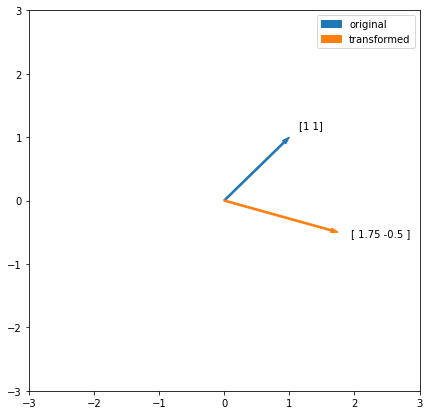

In [16]:
def draw_vectors(vecs, labels=None, ax=None, **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=(7, 7))
        
    arrows = []
    for i, vec in enumerate(vecs):
        color = f'C{i}'
        arrows.append(ax.arrow(0, 0, *vec, width=0.025, length_includes_head=True, ec=color, fc=color))
        ax.annotate(str(vec), xy=vec + 0.2 * vec / linalg.norm(vec))
    
    ax.set(xlim=(-3, 3), ylim=(-3, 3), **kwargs)
    
    if labels is not None:
        plt.legend(arrows, labels)
    
draw_vectors([x, x_transformed], ['original', 'transformed'])

In [17]:
eigvals, eigvecs = linalg.eig(M)
eigvecs = eigvecs.T
eigvals, eigvecs

(array([ 1. +0.j, -0.5+0.j]),
 array([[ 1.        ,  0.        ],
        [-0.4472136 ,  0.89442719]]))

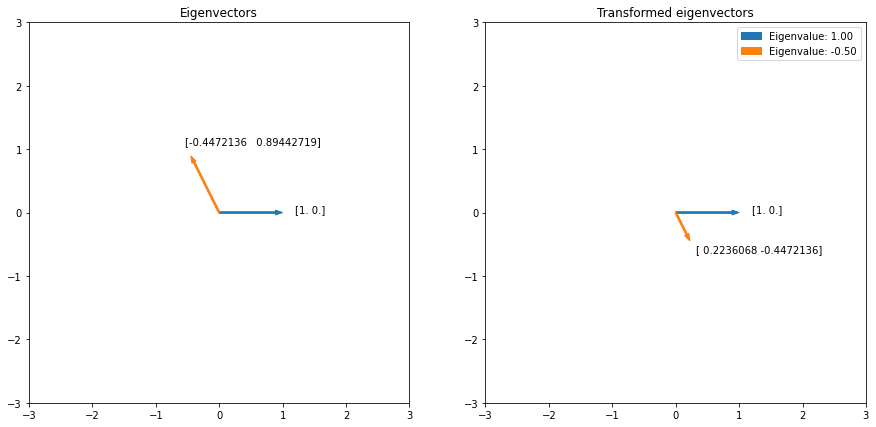

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))
labels = [f'Eigenvalue: {eigval.real:.2f}' for eigval in eigvals]
draw_vectors(eigvecs, labels, title='Eigenvectors', ax=axes[0])
draw_vectors([M @ eigvec for eigvec in eigvecs], title='Transformed eigenvectors', ax=axes[1])
plt.show()

SciPy's `eig` function is able to compute left and right eigenvectors. The most typical eigenvectors are right eigenvectors which are of the form $Mv=\lambda v$, while left eigenvectors correspond to $vM=\lambda v$.

In [19]:
eigvals, eigvecs = linalg.eig(M, left=False, right=True)
eigval, eigvec = eigvals[0].real, eigvecs.T[0]

print('First eigenvector:', eigvec)
print('First eigenvalue:', eigval)

print('Mv / lambda =', M @ eigvec / eigval)
print('vM / lambda =', eigvec @ M / eigval)

First eigenvector: [1. 0.]
First eigenvalue: 1.0
Mv / lambda = [1. 0.]
vM / lambda = [1.   0.75]


By default `left=False` and `right=True`, since right eigenvalues are more common than left eigenvalues.

In [20]:
eigvals, eigvecs = linalg.eig(M, left=True, right=False)
eigval, eigvec = eigvals[0].real, eigvecs.T[0]

print('First eigenvector:', eigvec)
print('First eigenvalue:', eigval)

print('Mv / lambda =', M @ eigvec / eigval)
print('vM / lambda =', eigvec @ M / eigval)

First eigenvector: [0.89442719 0.4472136 ]
First eigenvalue: 1.0
Mv / lambda = [ 1.22983739 -0.2236068 ]
vM / lambda = [0.89442719 0.4472136 ]


We can also get both at the same time.

In [21]:
linalg.eig(M, left=True, right=True)

(array([ 1. +0.j, -0.5+0.j]),
 array([[0.89442719, 0.        ],
        [0.4472136 , 1.        ]]),
 array([[ 1.        , -0.4472136 ],
        [ 0.        ,  0.89442719]]))

### Overlap with NumPy
The NumPy library also has a submodule called `linalg` which has some overlap with SciPy's `linalg` submodule (such as eigenvalue decomposition or linear equation solvers) but the SciPy submodule contains far more functions for different applications of linear algebra.

In [22]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

SciPy always returns the eigenvalues as a complex array while NumPy returns a real valued array if the eigenvalues are all real.

In [23]:
sp_eval, sp_evec = linalg.eig(x)
np_eval, np_evec = np.linalg.eig(x)

sp_eval, np_eval

(array([ 1.61168440e+01+0.j, -1.11684397e+00+0.j, -1.30367773e-15+0.j]),
 array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15]))

In [24]:
print('Eigenvalues form SciPy and NumPy match:', np.allclose(sp_eval, np_eval))
print('Eigenvectors from SciPy and NumPy match:', np.allclose(sp_evec, np_evec))

Eigenvalues form SciPy and NumPy match: True
Eigenvectors from SciPy and NumPy match: True


## Numerical calculus in Python

### Integrating
SciPy has a dedicated [submodule](https://docs.scipy.org/doc/scipy/reference/integrate.html#integration-and-odes-scipy-integrate) just for integrating called `integrate`. It contains functions for integrating multiple times in one go and even supports integration and solvers for ordinary differential equations.

In [25]:
from scipy import integrate

Here we will only have a look at the [`integrate.quad` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad), which can be used to compute a definite integral of some function.

In [26]:
def draw_integral(x, y, limits, integral, err, **kwargs):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y)
    
    integral_mask = (x >= limits[0]) & (x < limits[1])
    ax.fill_between(x[integral_mask], y[integral_mask], alpha=0.2)
    
    ax.axhline(0, c='black', alpha=0.5)
    ax.axvline(limits[0], c='black')
    ax.axvline(limits[1], c='black')
    
    ax.set(title=f'Integral result: {integral:.3f} (error: {err:.3g})', **kwargs)
    plt.show()

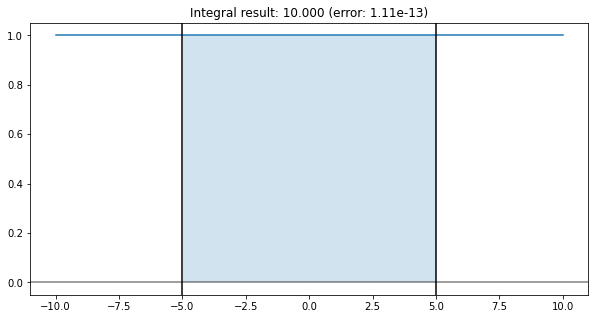

In [27]:
func = lambda x: 1

x = np.linspace(-10, 10, 1000)
y = np.array(list(map(func, x)))

limits = (-5, 5)
integral, err = integrate.quad(func, *limits)
draw_integral(x, y, limits, integral, err)

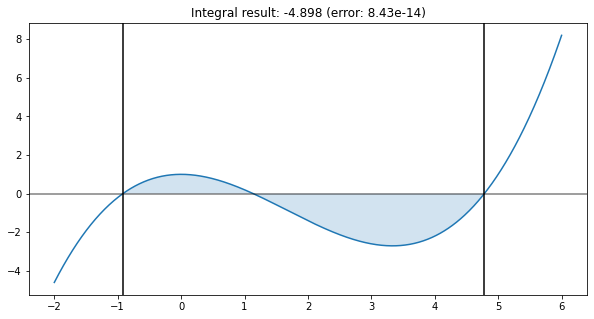

In [28]:
func = lambda x: 0.2 * x**3 - x**2 + 1

x = np.linspace(-2, 6, 1000)
y = np.array(list(map(func, x)))

limits = (-0.919, 4.781)
integral, err = integrate.quad(func, *limits)
draw_integral(x, y, limits, integral, err)

The `quad` function is numerically estimating the integration and does not check if a function can mathematically be integrated. It is therefore able to integrate some non-integratable functions but results might not be 100% accurate.

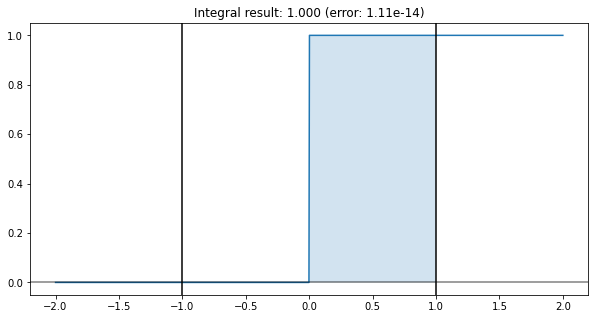

In [29]:
func = lambda x: float(x >= 0)

x = np.linspace(-2, 2, 1000)
y = np.array(list(map(func, x)))

limits = (-1, 1)
integral, err = integrate.quad(func, *limits)
draw_integral(x, y, limits, integral, err)

### Derivatives

In [30]:
from scipy import misc

SciPy has a function to estimate the derivative of any function at a certain location. The function if called `derivative` and is located in the `misc` submodule.

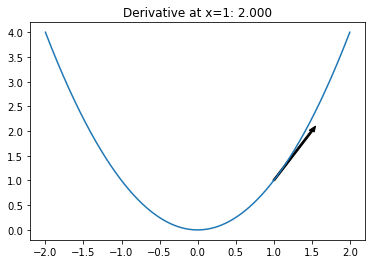

In [31]:
func = lambda x: x ** 2

xs = np.linspace(-2, 2, 1000)
ys = func(xs)

x = 1
y = func(x)
dx, dy = 1, misc.derivative(func, x)

plt.plot(xs, ys)
plt.arrow(x, y, dx / 2, dy / 2, width=0.025, fc='black')
plt.title(f'Derivative at x={x}: {dy:.3f}')
plt.show()

### Optimization

In [32]:
from scipy import optimize

The `minimize_scalar` function takes a univariate function as an argument. `minimize_scalar` minimizes the input variable with respect to the function's output. An `OptimizeResult` is returned, which includes information about the optimization process, e.g. if it succeeded, what the minimal function value was and where this minimum was found.

In [33]:
func = lambda x: x ** 2 + 1
optimize.minimize_scalar(func)

     fun: 1.0
    nfev: 40
     nit: 36
 success: True
       x: 9.803862664247969e-09

     fun: -0.5925925925925926
    nfev: 16
     nit: 12
 success: True
       x: 1.3333333341243754


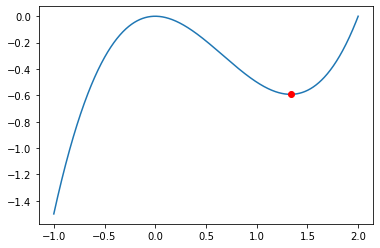

In [34]:
func = lambda x: 0.5 * x ** 3 - x ** 2

xs = np.linspace(-1, 2, 1000)
ys = func(xs)

res = optimize.minimize_scalar(func)

print(res)

plt.plot(xs, ys)
plt.plot(res.x, res.fun, 'ro')
plt.show()

`scipy.optimize.minimize` can be used to minimize the value of a multivariate function.

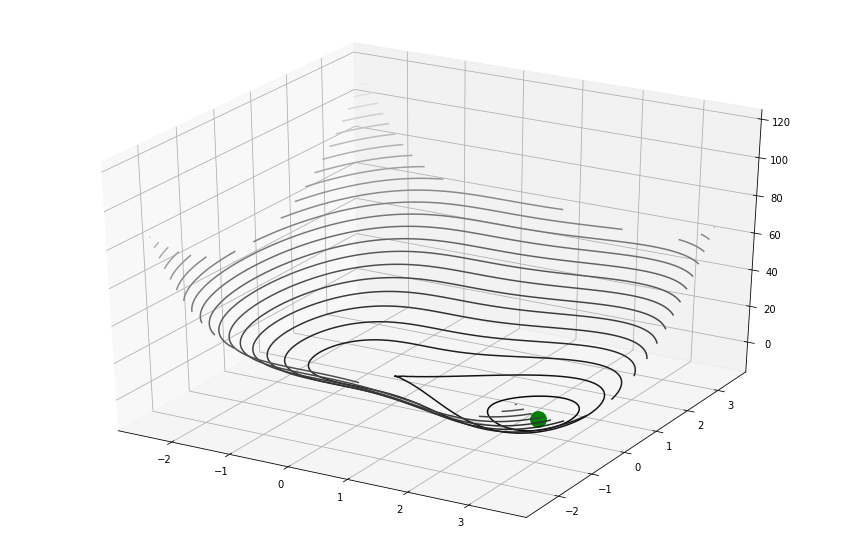

In [35]:
func = lambda var: 0.6 * var[0]**4 - 2 * var[0]**3 + 5 * var[1]**2

res = optimize.minimize(func, (1, 1))

vals = np.linspace(-2.5, 3.5, 100)
xs, ys = np.meshgrid(vals, vals)
zs = np.empty(xs.shape)
for i, j in np.ndindex(xs.shape):
    zs[i,j] = func((xs[i,j], ys[i,j]))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.contour(xs, ys, zs, 25, cmap='gray')
ax.scatter(*res.x, res.fun, c='g', s=250, marker='o')

plt.show()

Additionally to finding minimums, the `optimize` submodule can also find the roots of functions.

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.596968283237326


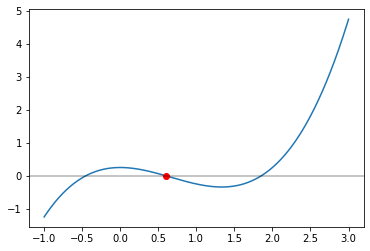

In [36]:
func = lambda x: 0.5 * x ** 3 - x ** 2 + 0.25

xs = np.linspace(-1, 3, 1000)
ys = func(xs)

res = optimize.root_scalar(func, x0=1, x1=3)

print(res)

plt.plot(xs, ys)
plt.plot(res.root, func(res.root), 'ro')
plt.axhline(0, c='black', alpha=0.3)
plt.show()

## Raccoons
The [`misc` submodule](https://docs.scipy.org/doc/scipy/reference/misc.html#miscellaneous-routines-scipy-misc) contains the function `face` which will return an image of a raccoon as a NumPy array.

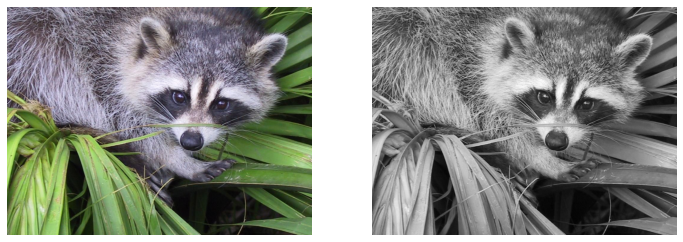

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))

ax1.imshow(misc.face())
ax2.imshow(misc.face(gray=True), cmap='gray')

ax1.axis('off')
ax2.axis('off')
plt.show()

## Signal processing
The `signal` submodule contains many functions for filtering and analyzing signals of any kind. Some examples in the `signal` submodule are convolution, bandpass filters, efficient wavelets, peak finding or spectral analysis.

Additionally, the `ndimage` submodule offers functions for multidimensional image (also includes one-dimensional data) processing. On top of multidimensional generalizations from `signal` the `ndimage` submodule also implements morphological operations on images, such as dilation, erosion, opening or closing.

In [38]:
from scipy import signal, ndimage

Here we create create an example of noisy data and try to reconstruct the original signal by filtering.

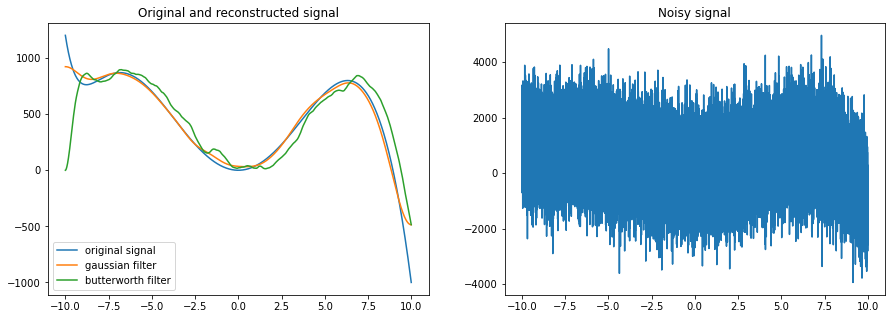

In [39]:
duration = 30
srate = 1024

def noise(size, strength=1):
    return np.random.normal(scale=strength, size=size)

x = np.linspace(-10, 10, srate * duration)
y = -0.5 * x ** 4 + 40 * x ** 2 + 0.1 / np.exp(x)
n = y + noise(y.size, strength=1000)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
axes[0].plot(x, y, label='original signal')
axes[1].plot(x, n)

# filter the noisy signal to reduce the noise
p1 = ndimage.gaussian_filter1d(n, sigma=1000)
p2 = signal.sosfilt(signal.butter(2, 0.3, fs=srate, output='sos'), n)

axes[0].plot(x, p1, label='gaussian filter')
axes[0].plot(x, p2, label='butterworth filter')
axes[0].legend()

axes[0].set_title('Original and reconstructed signal')
axes[1].set_title('Noisy signal')
plt.show()

### Audio signals
SciPy is capable of some basic audio processing. Therefore the `scipy.io.wavfile` submodule has functions for reading and writing audio wave files and `scipy.signal` offers tools for spectral analysis.

In [40]:
from scipy.io import wavfile

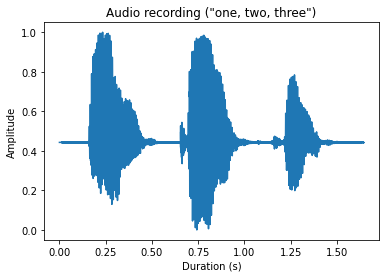

In [41]:
rate, audio = wavfile.read('data/audio.wav')
audio = (audio.astype(np.float) - audio.min()) / (audio.max().astype(np.float) - audio.min())

plt.title('Audio recording ("one, two, three")')
plt.plot(np.arange(len(audio)) / rate, audio)
plt.xlabel('Duration (s)')
plt.ylabel('Amplitude')
plt.show()

The `spectrogram` function tracks the frequencies present over time and displays them as an image with time on the x-axis and frequencies on the y-axis.

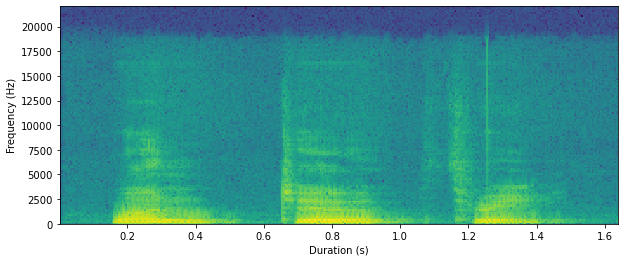

In [42]:
freqs, time, spec = signal.spectrogram(audio, fs=rate)

plt.figure(figsize=(10, 4))
plt.pcolormesh(time, freqs, np.log(spec))
plt.xlabel('Duration (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

### Image "signals"
Images can be seen as multidimensional signals (2D for grayscale and 3D for color) so we can use the same or very similar tools as we already know for one-dimensional signals.

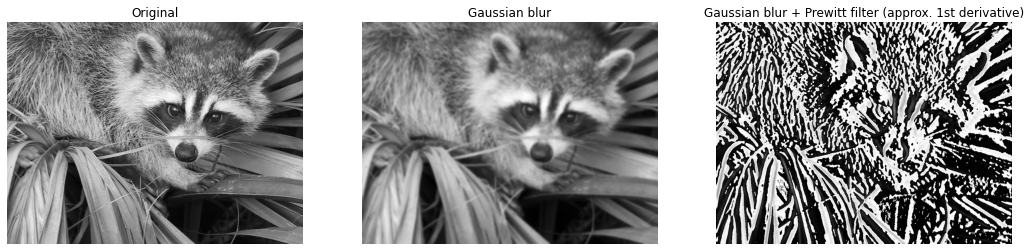

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))

ax1.imshow(misc.face(gray=True), cmap='gray')
ax2.imshow(ndimage.gaussian_filter(misc.face(gray=True), sigma=3), cmap='gray')
ax3.imshow(ndimage.prewitt(ndimage.gaussian_filter(misc.face(gray=True), sigma=3)), cmap='gray')

ax1.set_title('Original')
ax2.set_title('Gaussian blur')
ax3.set_title('Gaussian blur + Prewitt filter (approx. 1st derivative)')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

### Fourier analysis
The [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) is widely used method for working with data in a different domain than the original one. Every signal can be transformed into a sum of sinusoids with different frequencies. The Fourier transform is able to extract the amplitudes and phases of these sinusoids given an input signal. Its applications include filtering out certain frequencies, analyzing the frequency spectrum, compression (JPEG image format), extracting frequency bands (for example in EEG) or efficient convolution ([Convolution theorem](https://en.wikipedia.org/wiki/Convolution_theorem)).\
In computer science the continuous Fourier transform does not find many applications (since computers store data in a discrete way) but the [discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) is very common. The discrete Fourier transform is defined as
$$X_k=\sum_{n=0}^{N-1}{x_n \cdot e^{-\frac{i2\pi}{N}kn}}$$
with $x_n$ being the nth element in the discrete signal and $X$ the transformed signal. Conveniently, the signal array of length $N$ can losslessly be transformed into a frequency array of size $N$ and back but the frequency array consists of complex numbers to encode amplitude and phase.

In [44]:
from scipy import fft

Let's first look at a simple example where we want to figure out the frequency of a basic sine function.

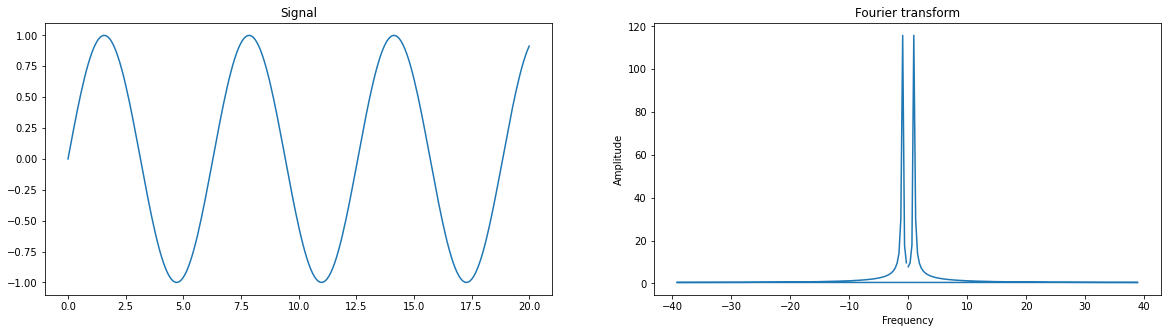

In [45]:
from ipywidgets import interactive
import ipywidgets as widgets

def plot_fourier(freq, sine1, sine2, sine3):
    xs = np.linspace(0, 20, 250)
    ys = np.sin(xs * freq)

    if sine1:
        ys += np.sin(xs * 3 + 1)
    if sine2:
        ys += np.sin(xs * 0.25 + 2)
    if sine3:
        ys += np.sin(xs * 25 + 0.2)
    
    fourier = fft.fft(ys)
    freqs = fft.fftfreq(len(ys), 1 / (2 * np.pi / xs.max() * len(ys)))

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
    ax1.plot(xs, ys)
    ax2.plot(freqs, np.abs(fourier))
    
    ax1.set_title('Signal')
    ax2.set(xlabel='Frequency', ylabel='Amplitude', title='Fourier transform')
    plt.show()
    
interactive(plot_fourier, freq=widgets.FloatSlider(min=1, max=40), sine1=widgets.Checkbox(), sine2=widgets.Checkbox(), sine3 = widgets.Checkbox())

NumPy also has a `fft` submodule for fast Fourier transforms but SciPy implements more variations.

# Statistical modeling with SciPy
Here we will only cover a few functions from the `scipy.stats` submodule. A more in-depth overview regarding statistical modeling will come next week with the statsmodels library. There are many overlaps between SciPy's statistical models and statsmodels' models but overall, statsmodels is the more powerful tool for statistics in Python.

In [46]:
from scipy import stats

The `stats` submodule contains implementations for sampling from many different statistical distributions (e.g. `chi2`, `norm`, `f`). These are implemented as objects on which you can call functions like `rvs` (random variates), `pdf` (probability density function) or `std` (standard deviation).

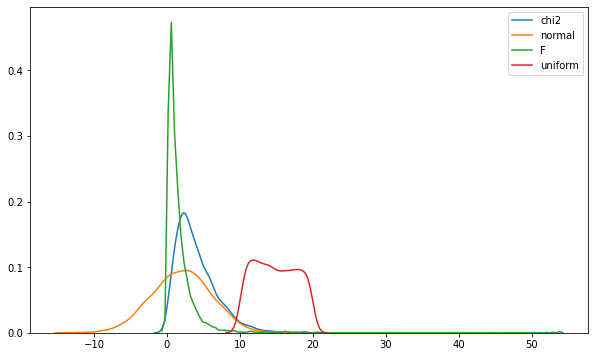

In [47]:
N = 2500

distrs = dict(
    chi2 = stats.chi2.rvs(df=4, size=N),
    normal = stats.norm.rvs(loc=2, scale=4, size=N),
    F = stats.f.rvs(dfn=2, dfd=7, size=N),
    uniform = stats.uniform.rvs(loc=10, scale=10, size=N)
)
    
plt.figure(figsize=(10, 6))
for name, distr in distrs.items():
    sns.distplot(distr, hist=False, label=name)
plt.show()

Similar to pandas, the `stats` submodule also has a `describe` function which computes a few descriptive statistics on the passed data

In [48]:
for name, distr in distrs.items():
    print(f'{name}:\n{stats.describe(distrs[name])}\n')

chi2:
DescribeResult(nobs=2500, minmax=(0.04615787334590003, 18.526052511928775), mean=4.0282695820374705, variance=7.679475147571934, skewness=1.292457298347532, kurtosis=2.2340125912964774)

normal:
DescribeResult(nobs=2500, minmax=(-12.590871412227933, 15.678161163202454), mean=2.012749018098067, variance=16.50584213343162, skewness=-0.030029153723011397, kurtosis=-0.010509181288360647)

F:
DescribeResult(nobs=2500, minmax=(0.001313228877806959, 53.57261615569575), mean=1.4018034577579566, variance=4.890222194985754, skewness=8.195893647252706, kurtosis=139.71163095168887)

uniform:
DescribeResult(nobs=2500, minmax=(10.00023695901962, 19.982110484095386), mean=14.880038414993132, variance=8.309653591782533, skewness=0.07941706362107015, kurtosis=-1.2193670857325158)



Many statistical models rely on the assumption that a random variable is normally distributed. In order to use such models it is important to first test if the assumptions are valid for certain random variable you have observed. One way to test if the data is normally distributed is the Shapiro-Wilk test. SciPy implements this test in the `shapiro` function. It accepts a single array with observations and returns the test statistic and p-value. The Shapiro-Wilk test's null hypothesis is that the samples come from a normal distribution. If the p-value is smaller than a certain threshold (0.05 in our case), we can reject the null hypthesis and assume that the data is not normally distributed.

In [49]:
p_threshold = 0.05

for name, distr in distrs.items():
    W, p = stats.shapiro(distr)
    print(f'{name}:')
    print(f'\tW: {W:.3g}')
    print(f'\tp-value: {p:.3g}')
    print(f'\tNormally distributed? {p > p_threshold}')

chi2:
	W: 0.909
	p-value: 2.41e-36
	Normally distributed? False
normal:
	W: 1
	p-value: 0.946
	Normally distributed? True
F:
	W: 0.515
	p-value: 0
	Normally distributed? False
uniform:
	W: 0.952
	p-value: 7.23e-28
	Normally distributed? False


Now that we know that `distrs['normal']` is normally distributed, we can run a test to see if the mean of our distribution is equal to 2. For that we use the `ttest_1samp` function to perform a one sample t-test. We have to pass our data and the expected mean to the function and it will return the t-statistic and a p-value. The one sample t-test is a two-sided test with the null hypothesis that the sample's expected value (mean) is equal to the expected mean that we pass to the function. If the p-value is smaller than a certain threshold (0.05), we can reject the null hypothesis and assume that the expected value is different.

In [50]:
p_threshold = 0.05
result = stats.ttest_1samp(distrs['normal'], 2)
print(f't-statistic: {result.statistic}\np-value: {result.pvalue}\nreject null hypothesis? {result.pvalue < p_threshold}')

t-statistic: 0.15690179007380586
p-value: 0.8753349237062038
reject null hypothesis? False
